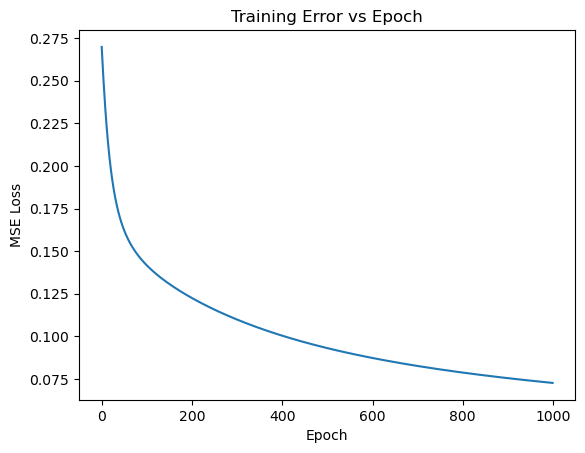

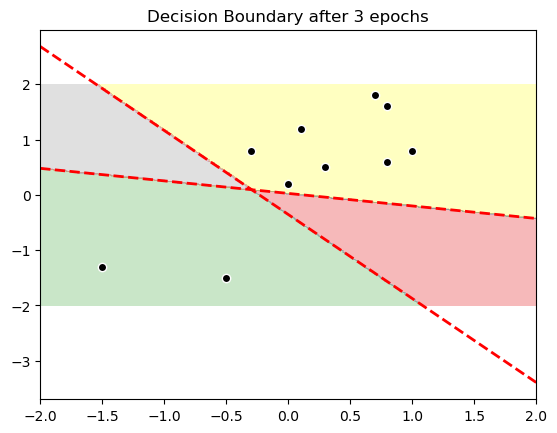

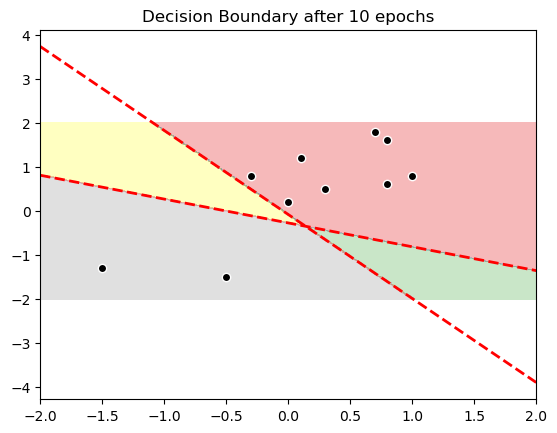

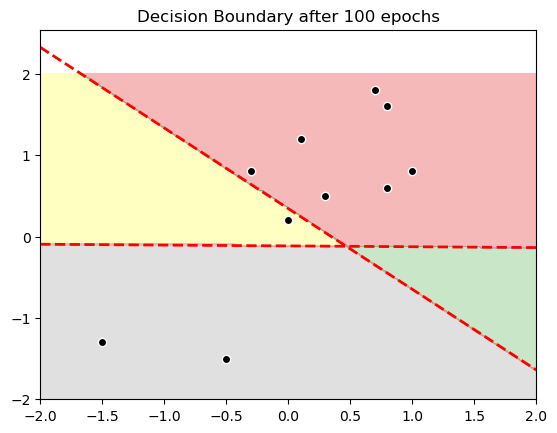

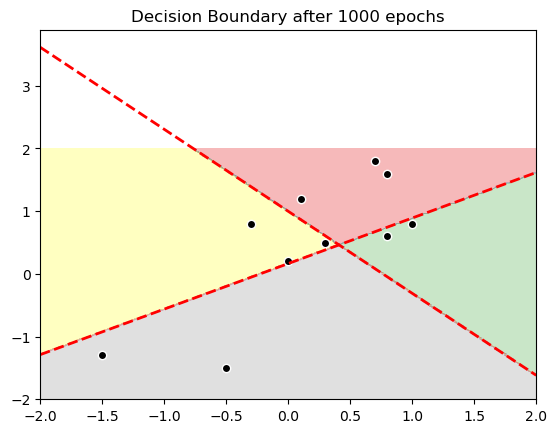

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# THEORY 
# ==========================================================
# We are building a ONE-LAYER Neural Network with:
# - Input: 2 neurons (x1, x2)
# - Output: 2 neurons (to represent 4 groups using binary codes)
#
# The forward pass is:
#   Y = sigmoid(WX + b)
# where W is (2x2), X is (2xN), b is (2x1).
#
# Decision boundaries occur when the network is "undecided".
# For sigmoid activation:
#   y = sigmoid(z) = 0.5 <=> z = 0
# So, boundary equation is:
#   w1*x1 + w2*x2 + b = 0
# which is just a LINE in 2D.
#
# Each output neuron gives one such line. Two outputs => two lines.
# These two lines divide the plane into 4 regions, corresponding
# to the 4 codes: (1,0), (0,0), (1,1), (0,1).
# ==========================================================

# 1. Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid = σ(z)(1-σ(z))
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


# 2. Dataset
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2,  0.8, -1.5, -1.3]])  # shape (2,10)

Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])  # shape (2,10)


# 3. Initialize weights and biases

np.random.seed(42)
W = np.random.randn(2, 2) * 0.1
b = np.zeros((2,1))

# Hyperparameters
lr = 0.1
epochs = 1000
errors = []
snapshots = {3: None, 10: None, 100: None, 1000: None}

# 4. Training loop (manual backpropagation)

for epoch in range(1, epochs+1):
    # Forward pass
    Z = np.dot(W, X) + b
    Y_pred = sigmoid(Z)

    # Loss (MSE)
    loss = np.mean((Y_pred - Y) ** 2)
    errors.append(loss)

    # Backward pass
    dL_dY = (2 / X.shape[1]) * (Y_pred - Y)     # dL/dY_pred
    dY_dZ = sigmoid_derivative(Z)              # dY_pred/dZ
    dL_dZ = dL_dY * dY_dZ                      # chain rule

    dW = np.dot(dL_dZ, X.T)                    # (2x10)(10x2) = (2x2)
    db = np.sum(dL_dZ, axis=1, keepdims=True)  # (2x1)

    # Gradient descent update
    W -= lr * dW
    b -= lr * db

    # Save snapshots of weights/biases
    if epoch in snapshots:
        snapshots[epoch] = (W.copy(), b.copy())


# 5. Training error curve

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Error vs Epoch")
plt.show()


# 6. Functions to plot decision boundary

def get_boundary_points(W, b, x_range=(-2,2)):
    """Compute line points for each output neuron's decision boundary."""
    boundaries = []
    for i in range(2):  # two output neurons
        w1, w2 = W[i,0], W[i,1]
        b_i = b[i,0]
        if abs(w2) > 1e-6:  # avoid divide by zero
            x_vals = np.linspace(x_range[0], x_range[1], 100)
            y_vals = -(w1/w2) * x_vals - (b_i/w2)
            boundaries.append((x_vals, y_vals))
    return boundaries

def plot_decision_boundary(W, b, X, Y, title):
    # Create grid for region classification
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.array([xx.ravel(), yy.ravel()])

    Z = np.dot(W, grid) + b
    Y_pred = sigmoid(Z)

    # Assign class by nearest binary code
    codes = np.array([[1,0],[0,0],[1,1],[0,1]])
    labels = []
    for i in range(Y_pred.shape[1]):
        dists = np.linalg.norm(codes - Y_pred[:, i].reshape(-1,1).T, axis=1)
        labels.append(np.argmin(dists))
    labels = np.array(labels).reshape(xx.shape)

    # Plot regions
    plt.contourf(xx, yy, labels, alpha=0.3, cmap=plt.cm.Set1)

    # Plot training points
    for i in range(Y.shape[1]):
        plt.scatter(X[0,i], X[1,i], c='k', edgecolors='w')

    # Plot raw boundary lines
    boundaries = get_boundary_points(W, b)
    for x_vals, y_vals in boundaries:
        plt.plot(x_vals, y_vals, 'r--', linewidth=2)

    plt.title(title)
    plt.show()


# 7. Show decision boundaries at different epochs

for e, (W_snap, b_snap) in snapshots.items():
    plot_decision_boundary(W_snap, b_snap, X, Y, f"Decision Boundary after {e} epochs")